# Итоговый проект.

`Анализ личности клиента — это подробный анализ клиентов компании. Он помогает компании лучше понять своих клиентов и облегчает изменение продукции в соответствии со специфическими потребностями, поведением различных типов клиентов.

Анализ личности клиента помогает компании модифицировать свой продукт в соответствии с целевыми потребителями из различных сегментов потребителей. Например, вместо того, чтобы тратить деньги на маркетинг нового продукта для каждого клиента в базе данных компании, компания может проанализировать, какой сегмент клиентов с наибольшей вероятностью купит продукт, и затем продвигать продукт только для этого сегмента.

Описание столбцов:

|Название| Описание |
|--|--|
|ID| Уникальный идентификатор клиента|
|Year_Birth| Год рождения клиента|
|Education | Уровень образования клиента|
|Marital_Status| Семейное положение клиента|
|Income| Годовой доход семьи клиента|
|Kidhome| Количество детей в семье клиента|
|Teenhome| Количество подростков в домохозяйстве клиента|
|Dt_Customer| Дата регистрации клиента в компании|
|Recency| Количество дней с момента последней покупки клиента|
|Complain| 1, если клиент жаловался в течение последних 2 лет, 0 —  в противном случае|
|MntWines|  Сумма, потраченная на вино за последние 2 года|
|MntFruits| Сумма, потраченная на фрукты за последние 2 года|
|MntMeatProducts| Сумма, потраченная на мясо за последние 2 года|
|MntFishProducts| Сумма, потраченная на рыбу за последние 2 года|
|MntSweetProducts| Сумма, потраченная на сладости за последние 2 года|
|MntGoldProds| Сумма, потраченная на золото за последние 2 года|
|NumDealsPurchases| Количество покупок, совершенных со скидкой|
|AcceptedCmp1| 1, если клиент принял предложение в 1-й кампании, 0 — иначе|
|AcceptedCmp2| 1, если клиент принял предложение во 2-й компании, 0 — иначе|
|AcceptedCmp3| 1, если клиент принял предложение в 3-й кампании, 0 — иначе|
|AcceptedCmp4| 1, если клиент принял предложение в 4-й кампании, 0 — иначе|
|AcceptedCmp5| 1, если клиент принял предложение в 5-й кампании, 0 — иначе|
|Response| 1, если клиент принял предложение в последней кампании, 0 — иначе|
|NumWebPurchases| Количество покупок, совершенных через веб-сайт компании|
|NumCatalogPurchases| Количество покупок, сделанных с помощью каталога|
|NumStorePurchases| Количество покупок, сделанных непосредственно в магазинах|
|NumWebVisitsMonth| Количество посещений веб-сайта компании за последний месяц|

## Задание

Проведите полный цикл анализа данных (EDA), что проходили ранее. Этапы выполнения задания (наш pipeline):

1. Загрузка и предобработка данных. Очистить данные и удалить/заполнить пропуски.
2. Описательный анализ данных, просмотр данных и вывод статистик
3. Постройте необходимые графики для анализа
4. Проверьте гипотезы
5. Сделайте отчет-вывод по исследованию

Что хочет узнать заказчик?

1. Сколько в среднем клиенты тратят на каждый тип товара? На какой товар надо сделать акцент?
2. Какой средний возраст покупателя? Зависит ли возраст клиента от его покупок во всех категориях?
3. Тратят ли клиент больше денег, если у него много детей и иждивенцев?
4. Зависят ли покупки от образования? Что предпочитают люди чаще покупать в зависимости от образования?
5. Женатые люди тратят больше или меньше денег на покупку золота?
6. Люди, которые покупают товар на сайте чаще берут что-то со скидкой?
7. Зависит ли жалоба клиента от его трат?
8. Люди, принявшие предложение о покупке лишь в последней компании тратят больше, чем люди, принявшие сразу предложение первой компании?

## Загрузка данных

In [65]:
!pip install phik

In [66]:
### импортируйте нужные библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from phik import phik_matrix

!gdown 11rHycDe8hVMErp-X222q0BdZNV31EE87

Downloading...
From: https://drive.google.com/uc?id=11rHycDe8hVMErp-X222q0BdZNV31EE87
To: /content/marketing_campaign.csv
100% 220k/220k [00:00<00:00, 82.8MB/s]


In [67]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [68]:
# ваш код здесь
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2221,7366,1982,Master,Single,75777.0,0,0,04-07-2013,12,712,...,1,0,1,1,0,0,0,3,11,1
2179,4541,1955,Graduation,Together,38946.0,0,1,24-10-2013,84,116,...,5,0,0,0,0,0,0,3,11,0
1326,7937,1982,Graduation,Married,24711.0,0,0,18-04-2014,86,10,...,7,0,0,0,0,0,0,3,11,0
673,3197,1980,Graduation,Married,77353.0,0,1,16-12-2013,38,275,...,4,0,0,0,0,0,0,3,11,0
545,8541,1990,2n Cycle,Married,24683.0,1,0,08-03-2014,98,8,...,5,0,0,0,0,0,0,3,11,0


## Описательный анализ данных

Рассмотрите данные — изучите медианы, средние, дисперсии и т.д.

Что можете сказать о данных? Сделайте вывод.

In [69]:
# ваш код здесь
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Вывод:** В выборке 29 столбцов, из их числовых 26, категориальных 3, числовых пропусков 24 в столбце Income

## Предобработка данных

### Дубликаты

Предобработайте датасет — проверьте на наличие дубликатов и удалите, если они есть.

In [70]:
# ваш код здесь
df.drop_duplicates(inplace=True)

### Отсутствующие значения

Предобработайте датасет — проверьте на наличие NaN и удалите или заполните значения.

In [71]:
# ваш код здесь
print(df.isnull().sum())
df.dropna(inplace=True)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа — на `int` или `float`
- Если категории — можно оставить `object`

**Вывод:** Тип данных в датафрейме указан верно, удалено 24 пропуска


## Визуализация

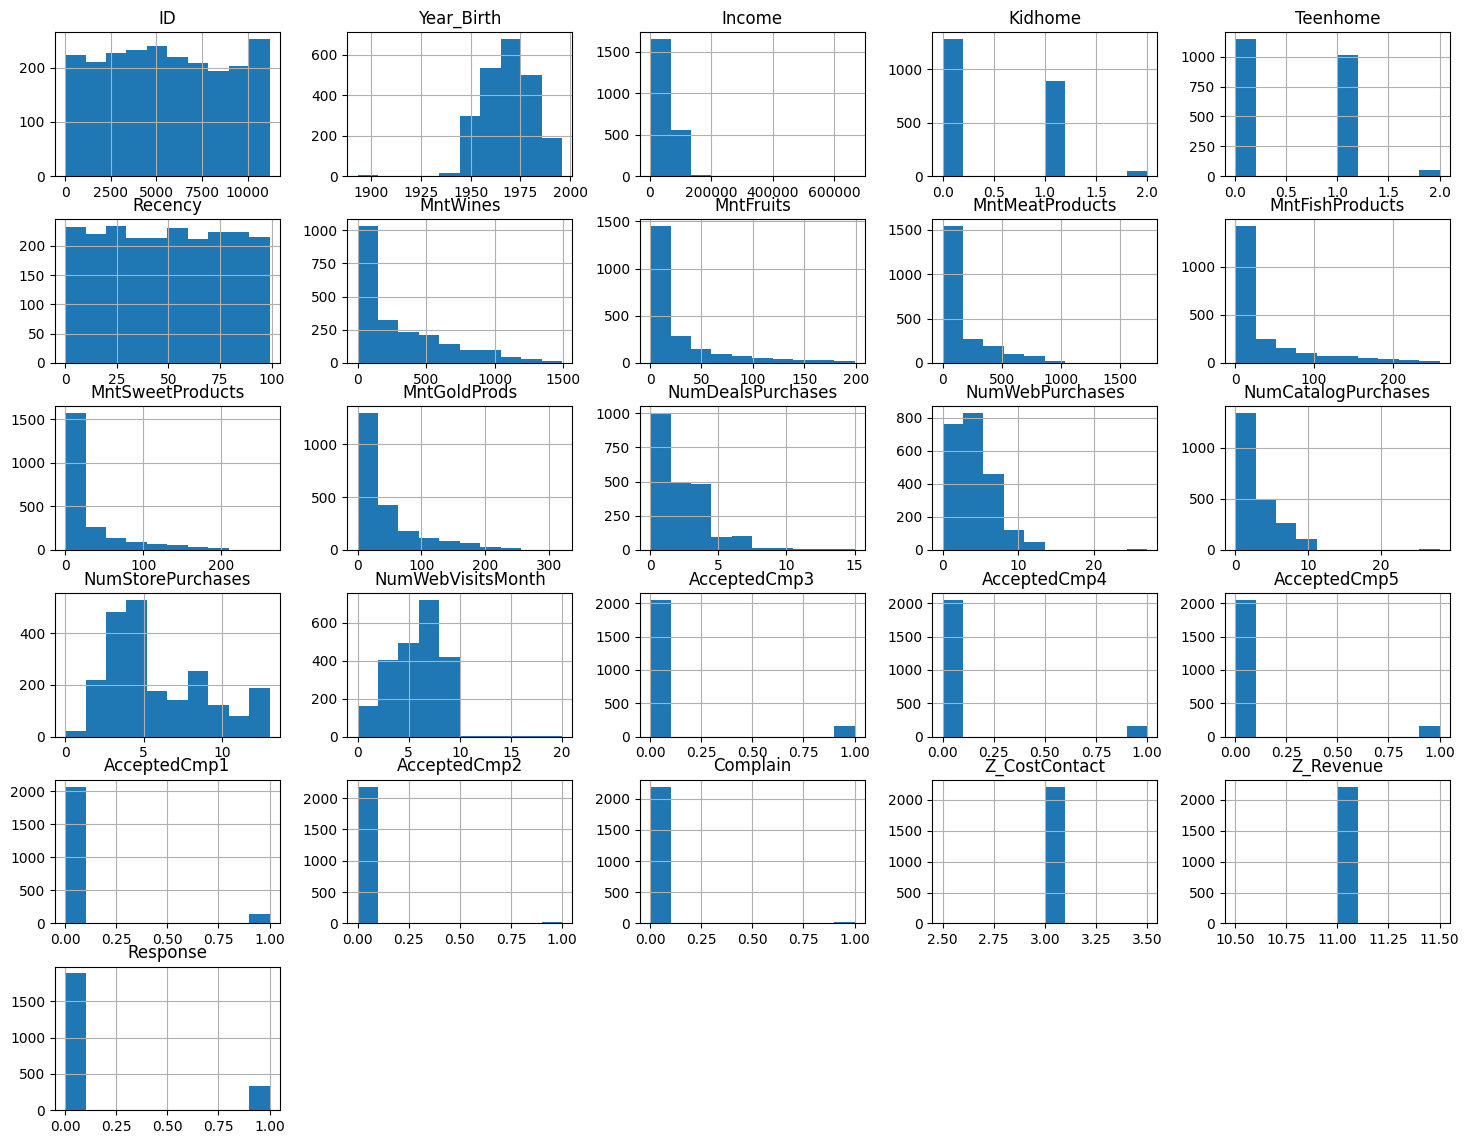

In [72]:
# ваш код здесь
df.hist(figsize=(18,14));

**Вывод:** Данне как то распределены, есть безполезные столбцы Z_CostContact и  Z_Revenue с одинаковыми значениями

## Задание от заказчика

1. Сколько в среднем клиенты тратят на каждый тип товара? На какой товар надо
сделать акцент?
2. Какой средний возраст покупателя? Зависит ли возраст клиента от его покупок во всех категориях?
3. Тратят ли клиент больше денег, если у него много детей и иждивенцев?
4. Зависят ли покупки от образования? Что предпочитают люди чаще покупать в зависимости от образования?
5. Женатые люди тратят больше или меньше денег на покупку золота?
6. Люди, которые покупают товар на сайте чаще берут что-то со скидкой?
7. Зависит ли жалоба клиента от его трат?
8. Люди, принявшие предложение о покупке лишь в последней компании тратят больше, чем люди, принявшие сразу предложение первой компании?

In [73]:
# ваш код здесь
print(f"Средняя сумма, потраченная на вино за последние 2 года     {df.MntWines.mean()}")
print(f"Средняя сумма, потраченная на фрукты за последние 2 года   {df.MntFruits.mean()}")
print(f"Средняя сумма, потраченная на мясо за последние 2 года     {df.MntMeatProducts.mean()}")
print(f"Средняя сумма, потраченная на рыбу за последние 2 года     {df.MntFishProducts.mean()}")
print(f"Средняя сумма, потраченная на сладости за последние 2 года {df.MntSweetProducts.mean()}")
print(f"Средняя сумма, потраченная на золото за последние 2 года   {df.MntGoldProds.mean()}")

Средняя сумма, потраченная на вино за последние 2 года     305.09160649819495
Средняя сумма, потраченная на фрукты за последние 2 года   26.356046931407942
Средняя сумма, потраченная на мясо за последние 2 года     166.99593862815885
Средняя сумма, потраченная на рыбу за последние 2 года     37.63763537906137
Средняя сумма, потраченная на сладости за последние 2 года 27.028880866425993
Средняя сумма, потраченная на золото за последние 2 года   43.96525270758123


1. Сколько в среднем клиенты тратят на каждый тип товара? На какой товар надо
сделать акцент?

  Больше всего в среднем клиенты тратят на вино, на нем необходимо сделать акцент если маржинальность по этому продукту также наибольшая

Средний возраст клиентов - 54.17960288808672


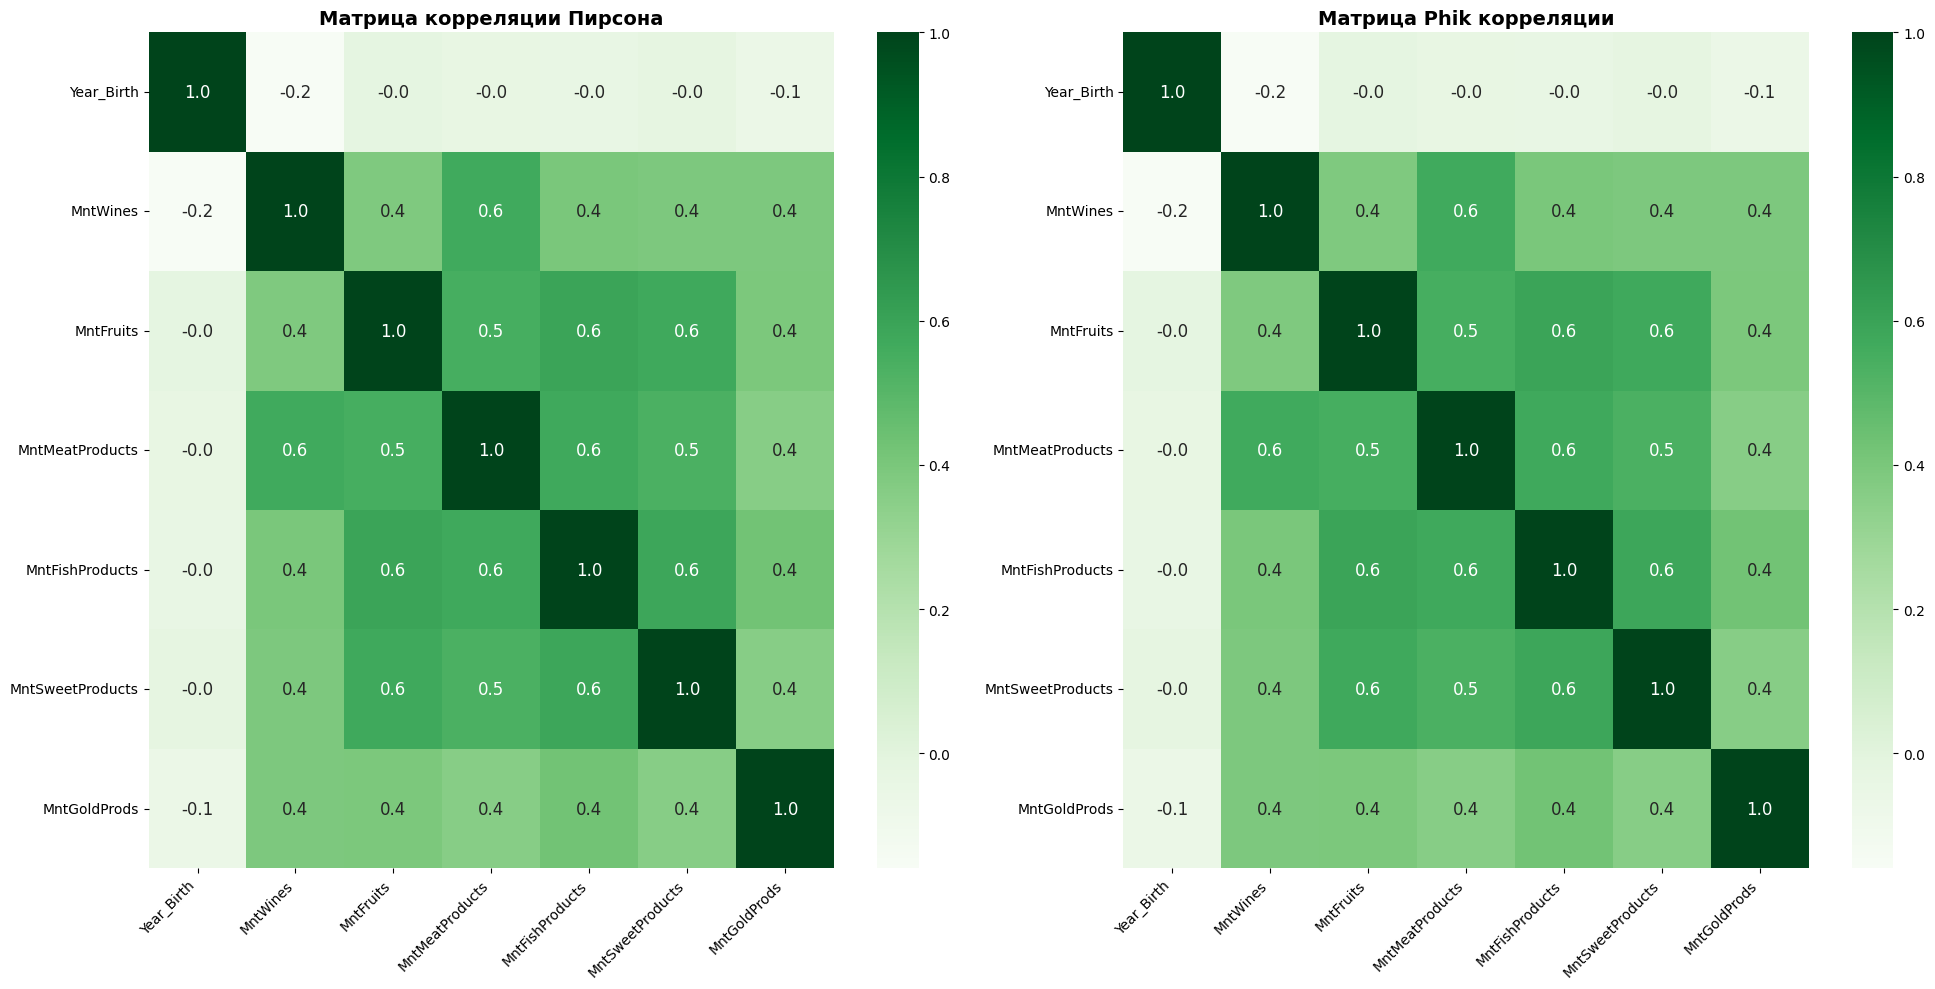

In [74]:
print(f"Средний возраст клиентов - {2023 - df.Year_Birth.mean()}")

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

df1 = df[['Year_Birth', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

correlation_matrix_p = df1.corr()
sns.heatmap(correlation_matrix_p, annot=True, cmap='Greens', ax=axs[0], fmt=".1f", annot_kws={'size':12})
axs[0].set_title('Матрица корреляции Пирсона', fontdict={'fontsize': 14, 'fontweight':'bold'})
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, horizontalalignment='right')

correlation_matrix_phik = df1.corr()
sns.heatmap(correlation_matrix_phik, annot=True, cmap='Greens', ax=axs[1], fmt=".1f", annot_kws={'size':12})
axs[1].set_title('Матрица Phik корреляции', fontdict={'fontsize': 14, 'fontweight':'bold'})
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

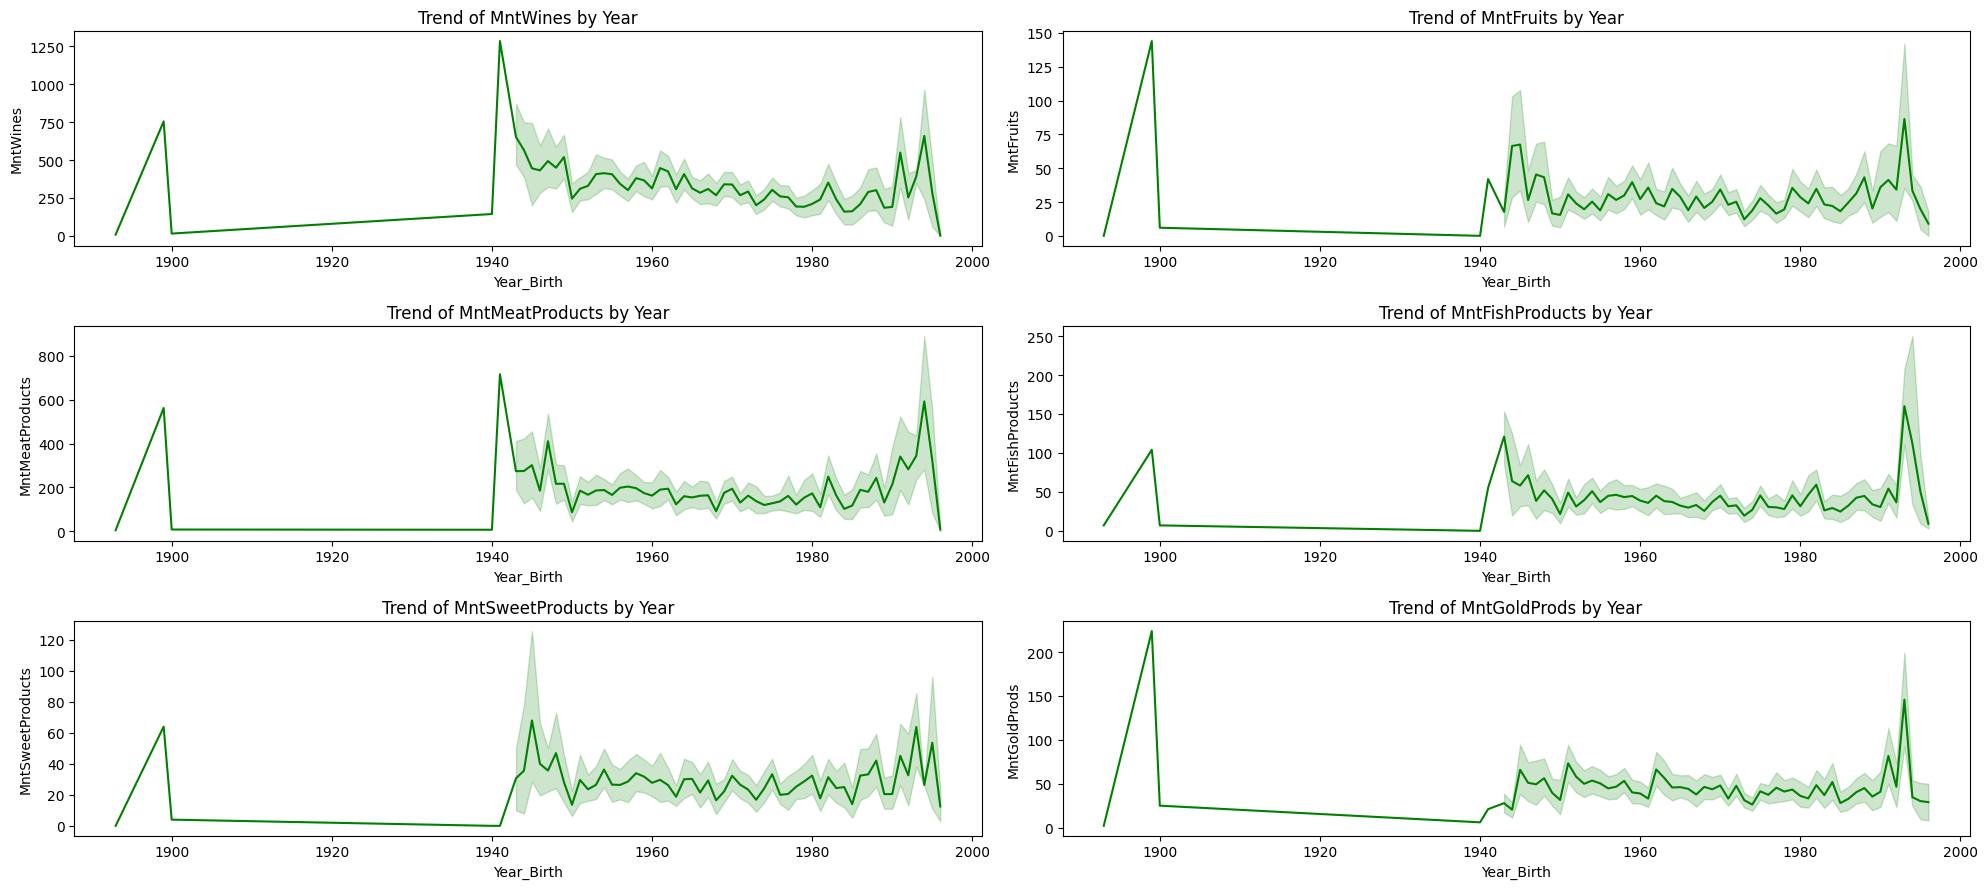

In [75]:
import math

n = len(df1.drop(columns=['Year_Birth']).columns)
ncols = 2
nrows = math.ceil(n/ncols)

fig, axs = plt.subplots(nrows, ncols, figsize=(20, 3*nrows))

for i, column in enumerate(df1.drop(columns=['Year_Birth']).columns):
    current_row = i // ncols
    current_col = i % ncols
    sns.lineplot(ax=axs[current_row, current_col], x = 'Year_Birth', y = column, data = df1, color='Green')
    axs[current_row, current_col].set_title(f'Trend of {column} by Year')

plt.tight_layout()
plt.show()

2. Какой средний возраст покупателя? Зависит ли возраст клиента от его покупок во всех категориях?

  Средний возраст покупателя  54. Нет корреляции Phik или Пирсона между датой рождения и тратами, но можно выделить  ±1995 год как самый платежеспособный

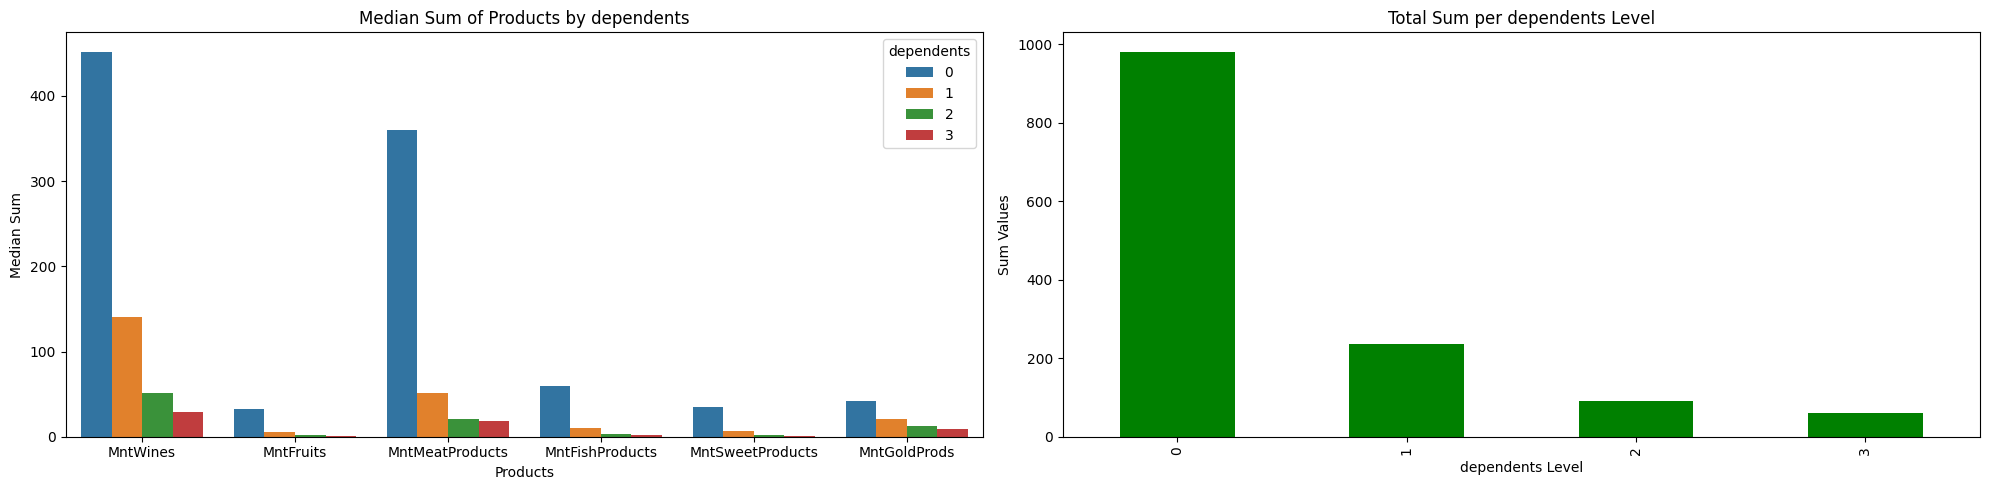

In [76]:
df['dependents'] = df['Kidhome'] + df['Teenhome']
grouped_df = df.groupby('dependents')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].median()
grouped_melted = grouped_df.reset_index().melt(id_vars='dependents')

fig, axs  = plt.subplots(1, 2, figsize=(20,5))

sns.barplot(x='variable', y='value', hue='dependents', data=grouped_melted, ax=axs[0])
axs[0].set_xlabel('Products')
axs[0].set_ylabel('Median Sum')
axs[0].set_title('Median Sum of Products by dependents')

grouped_df.sum(axis=1).plot(kind='bar', ax=axs[1],color="Green")
axs[1].set_title('Total Sum per dependents Level')
axs[1].set_ylabel('Sum Values')
axs[1].set_xlabel('dependents Level')

plt.tight_layout()
plt.show()

3. Тратят ли клиент больше денег, если у него много детей и иждивенцев?
  
  Нет, наоборот, чем больше детей и иждивенцев тем меньше клиенты тратят

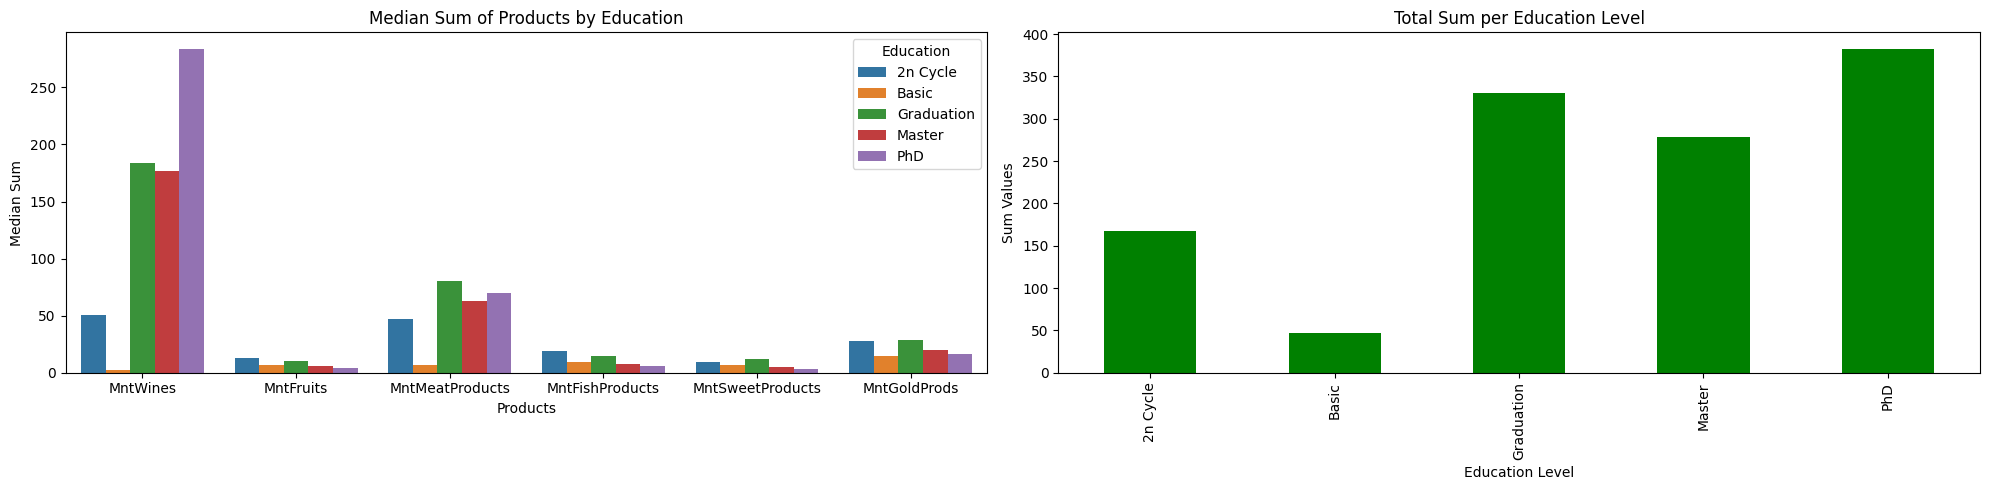

In [77]:
grouped_df = df.groupby('Education')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].median()

grouped_melted = grouped_df.reset_index().melt(id_vars='Education')

fig, axs  = plt.subplots(1, 2, figsize=(20,5))

sns.barplot(x='variable', y='value', hue='Education', data=grouped_melted, ax=axs[0])
axs[0].set_xlabel('Products')
axs[0].set_ylabel('Median Sum')
axs[0].set_title('Median Sum of Products by Education')

grouped_df.sum(axis=1).plot(kind='bar', ax=axs[1],color="Green")
axs[1].set_title('Total Sum per Education Level')
axs[1].set_ylabel('Sum Values')
axs[1].set_xlabel('Education Level')

plt.tight_layout()
plt.show()

4. Зависят ли покупки от образования? Что предпочитают люди чаще покупать в зависимости от образования?

  Оцениваем медианы для того, чтобы вычислить среднюю покупательскую способность групп. На вино больше тратят PhD, на фрукты 2n Cycle, на мясо Graduation, на рыбу 2n Cycle, на сладости Graduation, на золото 2n Cycle и Graduation тратят примерно одинаково, в среднем больше всего тратят PhD

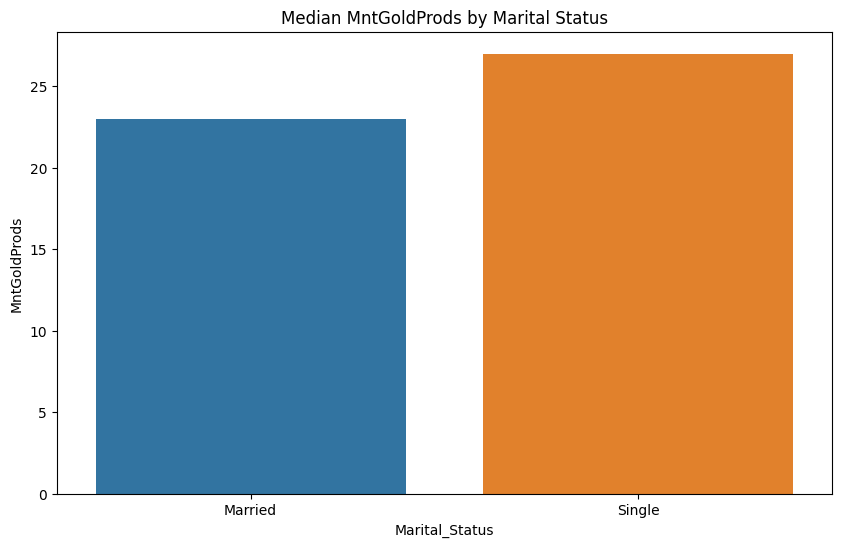

In [78]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if x not in ['Together','Married'] else 'Married')
grouped_df = df.groupby('Marital_Status')[['MntGoldProds']].median()
grouped_df_reset = grouped_df.reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Marital_Status', y='MntGoldProds', data=grouped_df_reset)
plt.title('Median MntGoldProds by Marital Status')
plt.show()

5. Женатые люди тратят больше или меньше денег на покупку золота?

  Женатые люди в среднем тратят меньше денег на покупку золота

In [79]:
df['WebPurcase_bool'] = df['NumWebPurchases'].apply(lambda x: 'WebPurcase' if x>0 else 'NoWebPurcase')
df.groupby('WebPurcase_bool')['NumDealsPurchases'].median()

WebPurcase_bool
NoWebPurcase    1.0
WebPurcase      2.0
Name: NumDealsPurchases, dtype: float64

6. Люди, которые покупают товар на сайте чаще берут что-то со скидкой?

  Да, люди которые покупают товар на сайте чаще берут что-то со скидкой

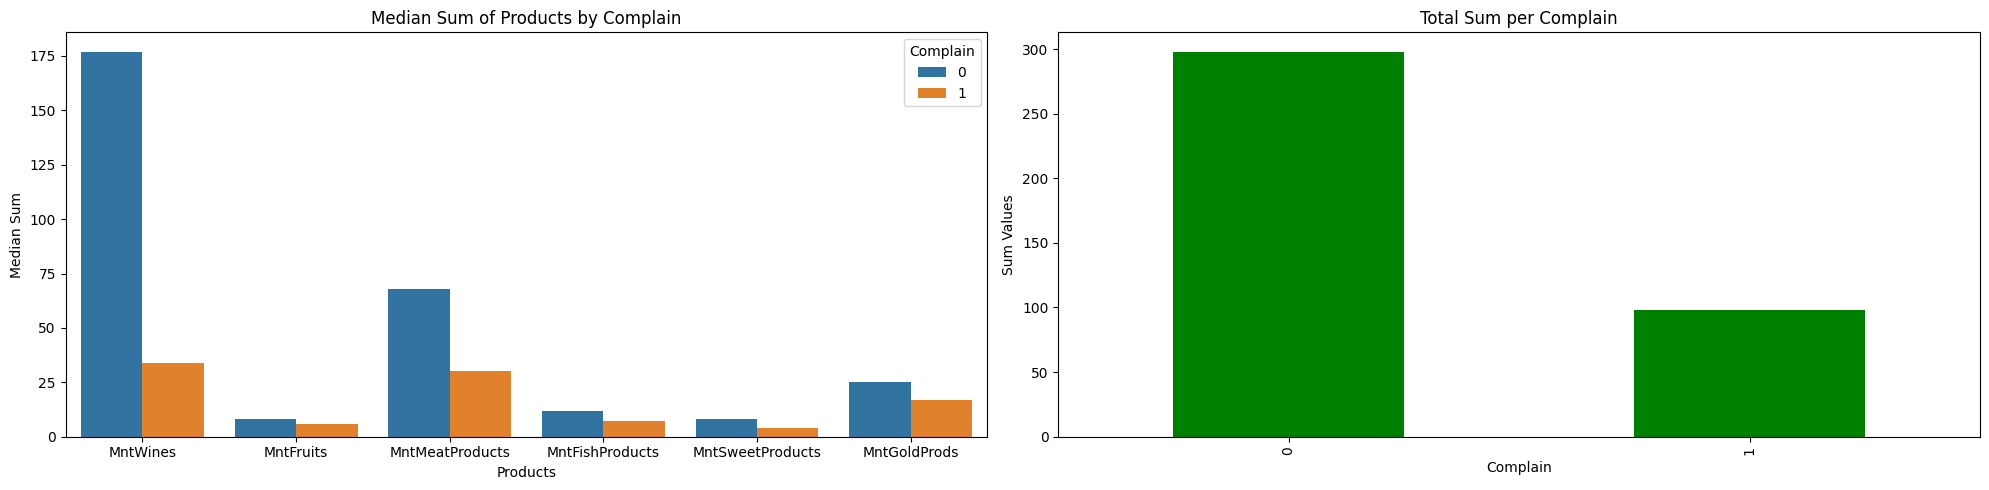

In [142]:
grouped_df = df.groupby('Complain')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].median()

grouped_melted = grouped_df.reset_index().melt(id_vars='Complain')

fig, axs  = plt.subplots(1, 2, figsize=(20,5))

sns.barplot(x='variable', y='value', hue='Complain', data=grouped_melted, ax=axs[0])
axs[0].set_xlabel('Products')
axs[0].set_ylabel('Median Sum')
axs[0].set_title('Median Sum of Products by Complain')

grouped_df.sum(axis=1).plot(kind='bar', ax=axs[1],color="Green")
axs[1].set_title('Total Sum per Complain')
axs[1].set_ylabel('Sum Values')
axs[1].set_xlabel('Complain')

plt.tight_layout()
plt.show()

7. Зависит ли жалоба клиента от его трат?

  У покупателей без жалоб траты по всем категориям выше

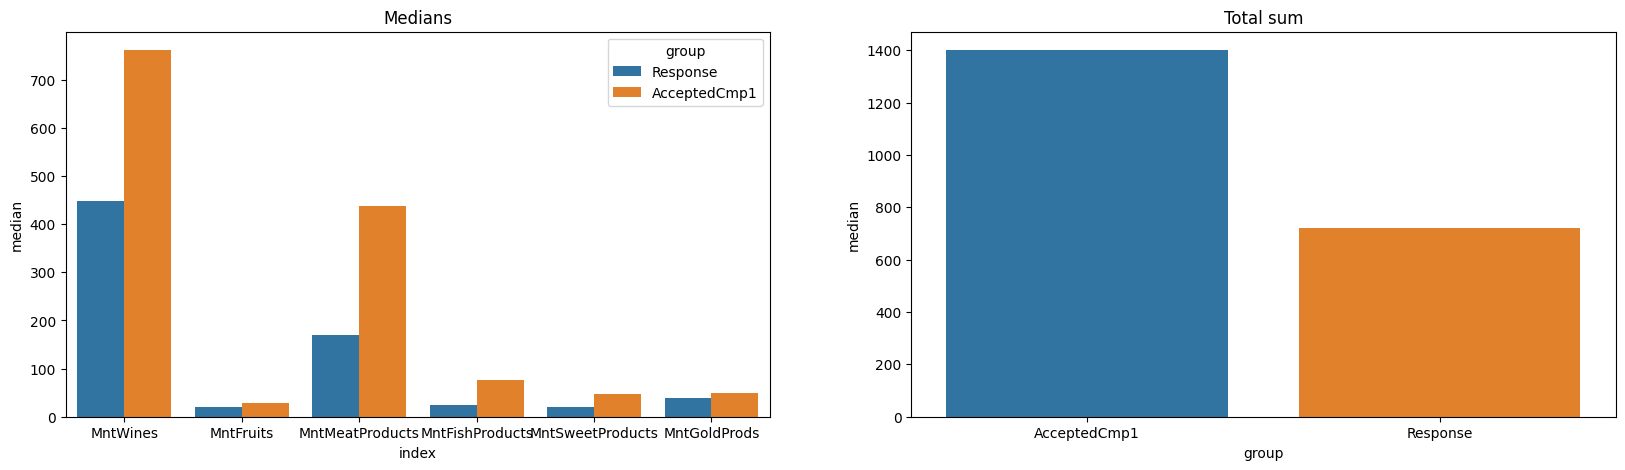

In [134]:
Response_df = df[df['Response']==1][['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].median()
AcceptedCmp1_df = df[df['AcceptedCmp1']==1][['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].median()

df1 = pd.DataFrame(Response_df, columns=['median']).reset_index()
df2 = pd.DataFrame(AcceptedCmp1_df, columns=['median']).reset_index()

df1['group'] = 'Response'
df2['group'] = 'AcceptedCmp1'

total_df = pd.concat([df1, df2])

total = total_df.groupby('group')['median'].sum().reset_index()

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

sns.barplot(x='index', y='median', hue='group', data=total_df, ax=axs[0])
axs[0].set_title('Medians')

sns.barplot(x='group', y='median', data=total, ax=axs[1])
axs[1].set_title('Total sum')

plt.show()

8. Люди, принявшие предложение о покупке лишь в последней компании тратят больше, чем люди, принявшие сразу предложение первой компании?

  Нет, люди приявшие решение о покупке лишь в последней компании тратят меньше денег чем люди принявшие сразу предложение первой компании

**Вывод:**

В основном использовалась медиана, для оценки среднего представителя каждой категории
1. Сколько в среднем клиенты тратят на каждый тип товара? На какой товар надо
сделать акцент?

  Больше всего в среднем клиенты тратят на вино, на нем необходимо сделать акцент если маржинальность по этому продукту также наибольшая# Общий вывод
2. Какой средний возраст покупателя? Зависит ли возраст клиента от его покупок во всех категориях?

  Средний возраст покупателя  54. Нет корреляции Phik или Пирсона между датой рождения и тратами, но можно выделить  ±1995 год как самый платежеспособный
3. Тратят ли клиент больше денег, если у него много детей и иждивенцев?

  Нет, наоборот, чем больше детей и иждивенцев тем меньше клиенты тратят
4. Зависят ли покупки от образования? Что предпочитают люди чаще покупать в зависимости от образования?

  Оцениваем медианы для того, чтобы вычислить среднюю покупательскую способность групп. На вино больше тратят PhD, на фрукты 2n Cycle, на мясо Graduation, на рыбу 2n Cycle, на сладости Graduation, на золото 2n Cycle и Graduation тратят примерно одинаково, в среднем больше всего тратят PhD
5. Женатые люди тратят больше или меньше денег на покупку золота?

  Женатые люди в среднем тратят меньше денег на покупку золота
6. Люди, которые покупают товар на сайте чаще берут что-то со скидкой?

  Да, люди которые покупают товар на сайте чаще берут что-то со скидкой

7. Зависит ли жалоба клиента от его трат?

  У покупателей без жалоб траты по всем категориям выше
8. Люди, принявшие предложение о покупке лишь в последней компании тратят больше, чем люди, принявшие сразу предложение первой компании?

  Нет, люди приявшие решение о покупке лишь в последней компании тратят меньше денег чем люди принявшие сразу предложение первой компании